### Vectorized Batch Gradient Descent
This notebook first generates training and test data sets using a chosen distribution and then uses Batch Gradient Descent to calculate the target distribution parameters.<br>The data sets created have 2 features excluding the bias feature for simplicity. The bias feature can also be added if needed.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
num_train_samples = 500
num_test_samples = 100
num_features = 2

### Generate regression data set.

In [2]:
# chosen coefficients for linear relationship
# ignoring the bias term for demo purpose
true_w = np.array([0.3, 1.2])

# generate synthetic training data
# training features
np.random.seed(42)
X_train = np.random.randn(
    num_train_samples, num_features
).T  # each col represents a sample in X_train

# corresponding training labels using true coefficients
np.random.seed(42)
y_train = np.dot(X_train.T, true_w)
X_train.shape, y_train.shape

((2, 500), (500,))

In [3]:
# generate synthetic test data with Gaussian random noise
np.random.seed(42)
X_test = np.random.randn(num_test_samples, num_features).T
np.random.seed(42)
y_test = np.dot(X_test.T, true_w)  # + np.random.normal(0, 5, num_test_samples)
X_test.shape, y_test.shape

((2, 100), (100,))

### Plot training data.

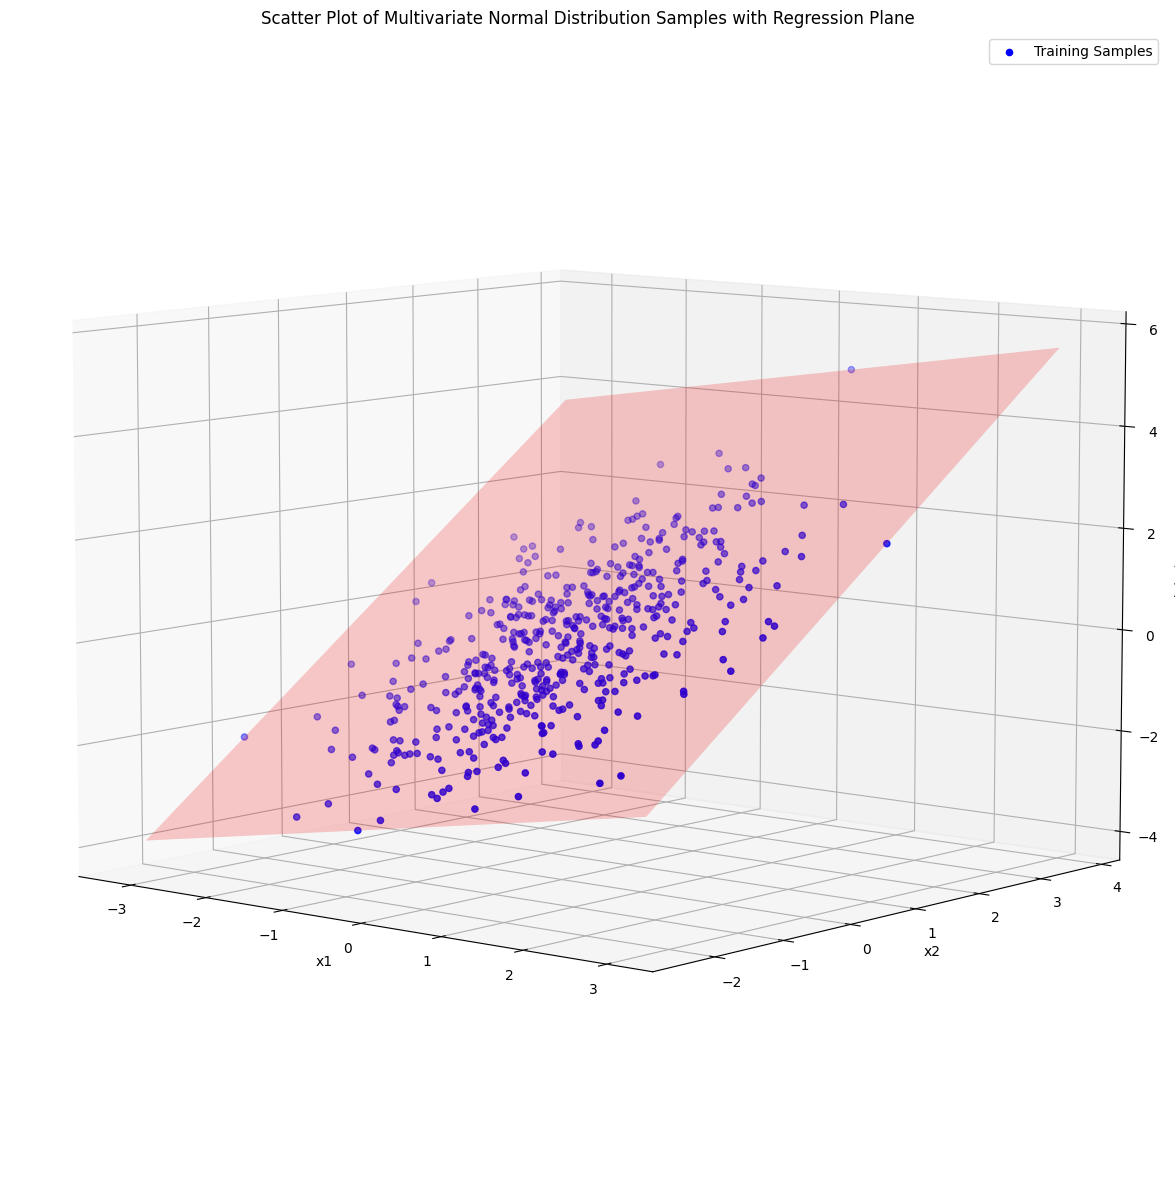

In [4]:
# calculate the label y = coeff_0 * x1 + coeff_1 * x2 + intercept

coeff_0 = true_w[0]
coeff_1 = true_w[1]
x1 = X_train[0, :]
x2 = X_train[1, :]
intercept = 0  # set to zero for simplicity
y = coeff_0 * x1 + coeff_1 * x2 + intercept

# scatter plot with third dimension
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x1, x2, y, c="blue", marker="o", label="Training Samples")

# set labels for the axes
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y label")

# set title
ax.set_title(
    "Scatter Plot of Multivariate Normal Distribution Samples with Regression Plane"
)

# add a grid
ax.grid(True, linestyle="--", linewidth=0.5)

# add legend
ax.legend()

# create the regression plane zz
xx1, xx2 = np.meshgrid(
    np.linspace(min(x1), max(x1), 10), np.linspace(min(x2), max(x2), 10), sparse=True
)
yy = coeff_0 * xx1 + coeff_1 * xx2
ax.plot_surface(xx1, xx2, yy, alpha=0.2, color="r")
ax.view_init(elev=8, azim=-50)  # Elevate by 8 degrees, rotate by -50 degrees

# show the plot
plt.show()

### Scale the features.

In [5]:
standard_scaler = StandardScaler()
normalized_X_train = standard_scaler.fit_transform(X_train.T).T
normalized_X_train.shape

(2, 500)

### Batch Gradient Descent.

In [6]:
# initialize variables
batch_size = len(X_train[0])
lr = 0.0005
# set stopping criteria as needed
stopping_criteria = 0.0001
# set a random value as initial dE_by_dw
dE_by_dw = normalized_X_train[:, 0]
L2_norms = []
epochs = []
tr_SSEs = []
test_SSEs = []
predicted_ws = []
ep = 0
# set initial weights
w = np.array([[2.0, 4.0]]).T

# Batch Gradient Descent: update weights until ||dE_by_dw|| < stopping criteria
while np.linalg.norm(dE_by_dw, ord=2) > stopping_criteria:
    if ep % 1000 == 1 or (np.linalg.norm(dE_by_dw, ord=1) <= stopping_criteria):
        # record epoch and norm
        epochs.append(ep)
        L2_norm = np.linalg.norm(dE_by_dw, ord=2)
        L2_norms.append(L2_norm)
        # predicted_ws.append(w.item())
        tr_SSE = np.sum(
            (np.dot(X_train.T, w) - y_train.reshape((len(X_train[0]), 1))) ** 2
        )
        test_SSE = np.sum(
            (np.dot(X_test.T, w) - y_test.reshape((len(X_test[0]), 1))) ** 2
        )
        tr_SSEs.append(tr_SSE)
        test_SSEs.append(test_SSE)
        print(
            "Ep: ",
            ep,
            " Tr. SSE: ",
            tr_SSE,
            " Test SSE: ",
            test_SSE,
            "L2 Norm:",
            L2_norm,
        )

    ep += 1

    # batch gradient update
    dE_by_dw = np.dot(
        normalized_X_train,
        (np.dot(normalized_X_train.T, w) - y_train.reshape((len(X_train[0]), 1))),
    )

    w = w - (lr * (1 / batch_size) * dE_by_dw)

Ep:  1  Tr. SSE:  5078.441355535354  Test SSE:  1010.2728013080387 L2 Norm: 1606.7034640050058
Ep:  1001  Tr. SSE:  1900.7541837171757  Test SSE:  377.83199223014583 L2 Norm: 985.7624126691356
Ep:  2001  Tr. SSE:  708.9946273999922  Test SSE:  140.83297784631316 L2 Norm: 604.8424231441121
Ep:  3001  Tr. SSE:  262.9542855142647  Test SSE:  52.19974136386482 L2 Norm: 371.145477997374
Ep:  4001  Tr. SSE:  96.59767343918534  Test SSE:  19.16648584903561 L2 Norm: 227.75953876847385
Ep:  5001  Tr. SSE:  34.91938506247524  Test SSE:  6.926762866272567 L2 Norm: 139.77774852092057
Ep:  6001  Tr. SSE:  12.281159306719868  Test SSE:  2.4364679227127604 L2 Norm: 85.78813413100181
Ep:  7001  Tr. SSE:  4.116116315376918  Test SSE:  0.817275201744585 L2 Norm: 52.655388934906625
Ep:  8001  Tr. SSE:  1.262245498170373  Test SSE:  0.251167490206416 L2 Norm: 32.320912227210805
Ep:  9001  Tr. SSE:  0.3232576908234599  Test SSE:  0.06464918361555892 L2 Norm: 19.840307079763843
Ep:  10001  Tr. SSE:  0.05307

### Results Observation

In [7]:
# true weights vs trained weights
print(
    "True w:",
    true_w,
    ", SGD w:",
    w,
)

True w: [0.3 1.2] , SGD w: [[0.28982024]
 [1.18916902]]


It can be seen that the predicted weights are close to the true parameters of the data source distribution.

#### Training error trend

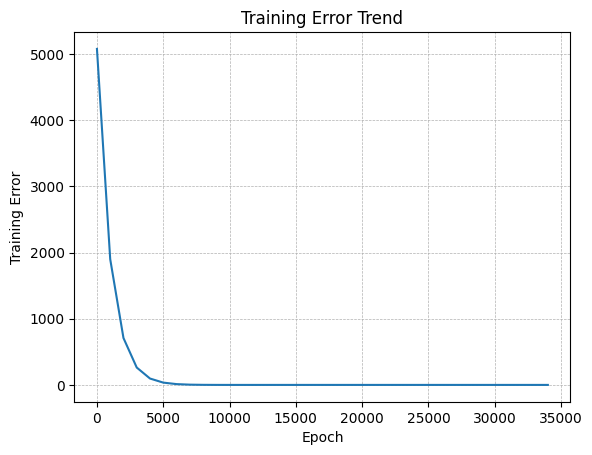

In [8]:
plt.plot(epochs, tr_SSEs)
plt.xlabel("Epoch")
plt.ylabel("Training Error")
plt.title("Training Error Trend")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

#### Test Error Trend

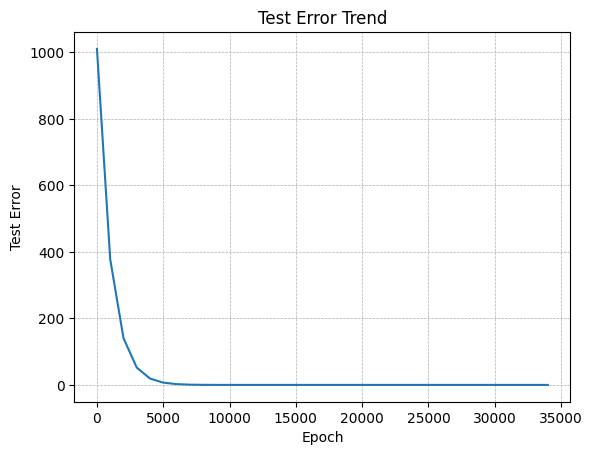

In [9]:
plt.plot(epochs, test_SSEs)
plt.xlabel("Epoch")
plt.ylabel("Test Error")
plt.title("Test Error Trend")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

#### L2 Norm of dE_by_dw Trend

Final weights:  [[0.28982024]
 [1.18916902]]


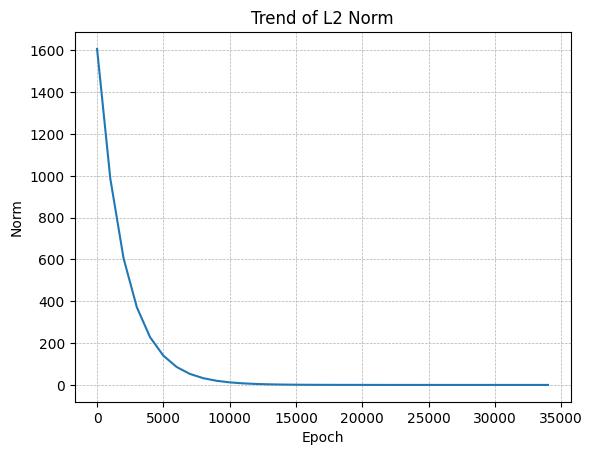

In [10]:
print("Final weights: ", w)
# Plot the L1 norm trend
plt.plot(epochs, L2_norms)
plt.xlabel("Epoch")
plt.ylabel("Norm")
plt.title("Trend of L2 Norm")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### Inference

In [11]:
def make_predictions(X_test, trained_weights):
    pred = np.dot(X_test.T, trained_weights)
    return pred

In [12]:
normalized_X_test = standard_scaler.transform(X_test.T).T
preds = np.dot(normalized_X_test.T, w)
preds.flatten()[0:10].tolist()

[-0.060058730556954605,
 1.9787868604299976,
 -0.39436628954956543,
 1.3515299953407494,
 0.46707390043268415,
 -0.7410570088714882,
 -2.2665037457210313,
 -1.235376566865805,
 0.030091517217955333,
 -2.0103278724382094]

In [13]:
y_test[0:10].tolist()

[-0.016902915502051797,
 2.021942389119838,
 -0.3512103607560174,
 1.394685519635708,
 0.5102297365226719,
 -0.6979010121280469,
 -2.2233476121195475,
 -1.192220384843077,
 0.07324746301400151,
 -1.967171664258713]

In [15]:
(preds.flatten()[0:10] - y_test[0:10]).tolist()

[-0.043155815054902805,
 -0.043155528689840184,
 -0.043155928793548015,
 -0.043155524294958614,
 -0.04315583608998774,
 -0.04315599674344128,
 -0.04315613360148385,
 -0.043156182022727974,
 -0.043155945796046175,
 -0.0431562081794965]

As seen above, the training sample's predictions are close to the true label.